# Wine Quality Prediction — Part 1: Data Loading and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style
sns.set(style='whitegrid', palette='muted', font_scale=1.1)


In [3]:
# Load the dataset (replace with your CSV file path)
df = pd.read_csv("WineQT.csv")

In [4]:
#  BASIC EXPLORATION
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
display(df.describe())

Dataset Shape: (1143, 13)

First 5 Rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB

Missing Values:
fixed acidity           0
volatile acidity 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
# Rename columns if needed for uniformity
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]


C:\Users\diwat\AppData\Local\Temp\ipykernel_6764\349951233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


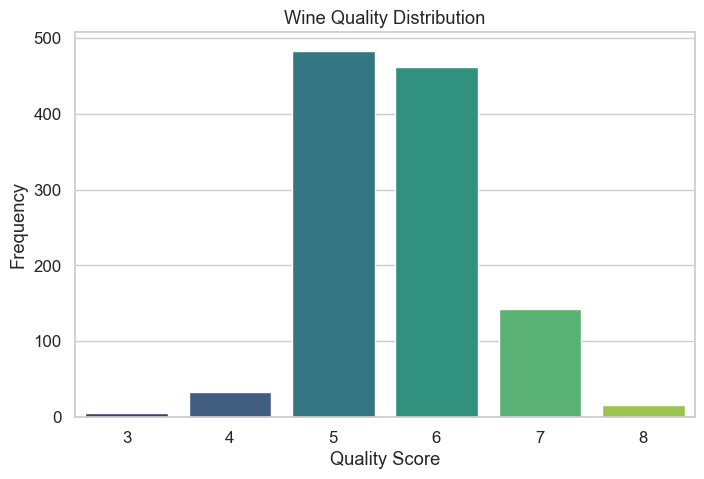

In [6]:
#  TARGET VARIABLE CHECK
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.show()

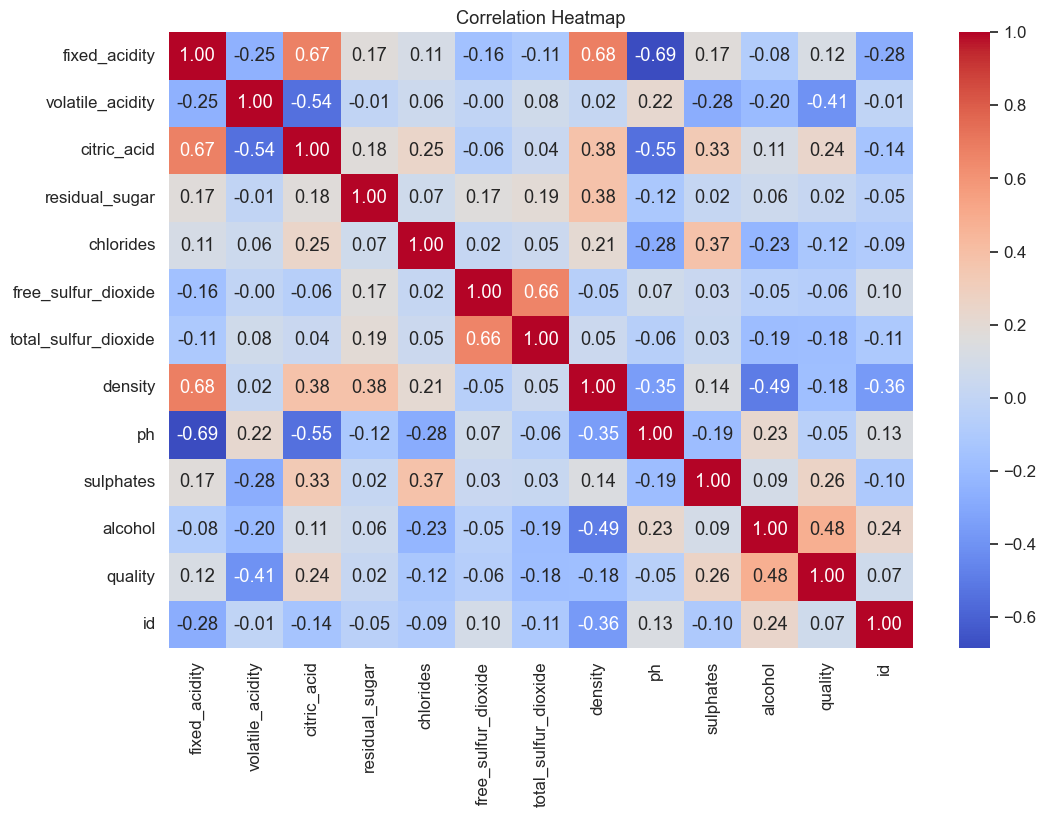

In [7]:
#  CORRELATION ANALYSIS
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Wine Quality Prediction — Part 2: Data Preprocessing & Feature Engineering
This part focuses on preparing the dataset for machine learning by:

Encoding target labels (classification)

Splitting into training and test sets

Scaling features for SVM and SGD

In [8]:
#  DATA CLEANING & PREPROCESSING


# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

# Drop if any
df = df.drop_duplicates()

Duplicate Rows: 0


In [9]:
#  TARGET ENCODING (QUALITY CATEGORIZATION)

# Quality is from 3 to 8, we'll group them:
# 3-5 -> Low, 6 -> Medium, 7-8 -> High

def encode_quality(q):
    if q <= 5:
        return "Low"
    elif q == 6:
        return "Medium"
    else:
        return "High"

df['quality_label'] = df['quality'].apply(encode_quality)
df['quality_label'] = pd.Categorical(df['quality_label'], categories=["Low", "Medium", "High"])

In [10]:
# Encode labels to numeric
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['quality_label'])

# Drop original quality if needed
df.drop(['quality'], axis=1, inplace=True)

In [11]:
#  FEATURE SELECTION

X = df.drop(['quality_label', 'label'], axis=1)
y = df['label']

In [12]:
#  TRAIN-TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [13]:
#  FEATURE SCALING

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Preprocessing Completed ✅")

Data Preprocessing Completed ✅


# Wine Quality Prediction — Part 3: Model Training, Evaluation & Comparison
We'll:

Train and evaluate 3 classifiers

Use metrics like accuracy, precision, recall, F1

Visualize confusion matrices and results

In [14]:
#  MODEL TRAINING & EVALUATION SETUP

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# For reproducibility
seed = 42

In [16]:
# Helper function to train and evaluate
def evaluate_model(model, X_tr, y_tr, X_te, y_te, model_name):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)

    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, average='weighted')
    rec = recall_score(y_te, y_pred, average='weighted')
    f1 = f1_score(y_te, y_pred, average='weighted')

    print(f"🔍 {model_name} Classification Report:")
    print(classification_report(y_te, y_pred, target_names=label_encoder.classes_))

    # Confusion matrix
    
    cm = confusion_matrix(y_te, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

🔍 Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.69      0.60      0.64        40
         Low       0.76      0.72      0.74       131
      Medium       0.61      0.67      0.64       115

    accuracy                           0.68       286
   macro avg       0.68      0.66      0.67       286
weighted avg       0.69      0.68      0.68       286



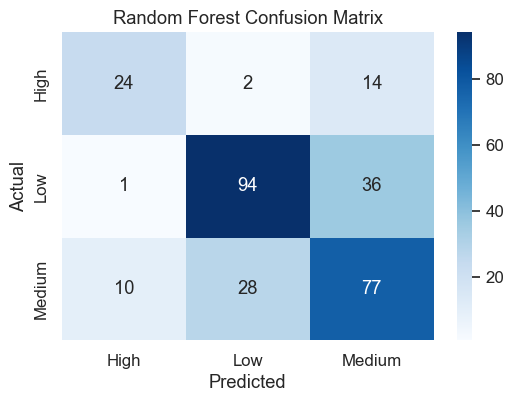

In [17]:
#  RANDOM FOREST

rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)
rf_results = evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

🔍 SGD Classifier Classification Report:
              precision    recall  f1-score   support

        High       0.27      0.23      0.25        40
         Low       0.69      0.78      0.73       131
      Medium       0.49      0.44      0.46       115

    accuracy                           0.57       286
   macro avg       0.48      0.48      0.48       286
weighted avg       0.55      0.57      0.56       286



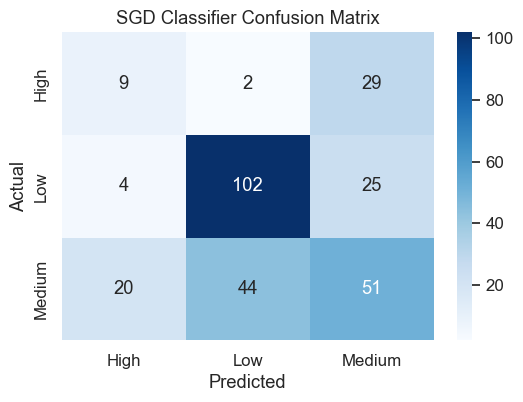

In [18]:
#  STOCHASTIC GRADIENT DESCENT

sgd_model = SGDClassifier(random_state=seed)
sgd_results = evaluate_model(sgd_model, X_train_scaled, y_train, X_test_scaled, y_test, "SGD Classifier")


🔍 SVC Classification Report:
              precision    recall  f1-score   support

        High       0.52      0.30      0.38        40
         Low       0.75      0.71      0.73       131
      Medium       0.54      0.65      0.59       115

    accuracy                           0.63       286
   macro avg       0.60      0.55      0.57       286
weighted avg       0.63      0.63      0.62       286



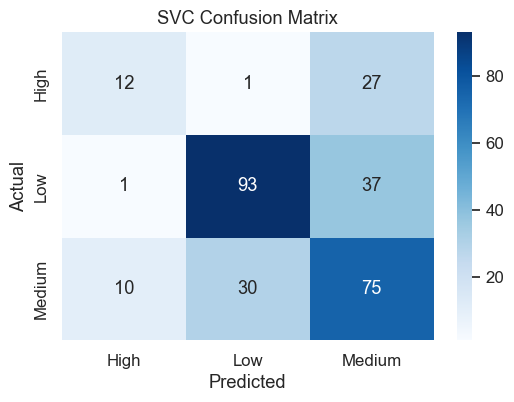

In [19]:
#  SUPPORT VECTOR CLASSIFIER

svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=seed)
svc_results = evaluate_model(svc_model, X_train_scaled, y_train, X_test_scaled, y_test, "SVC")


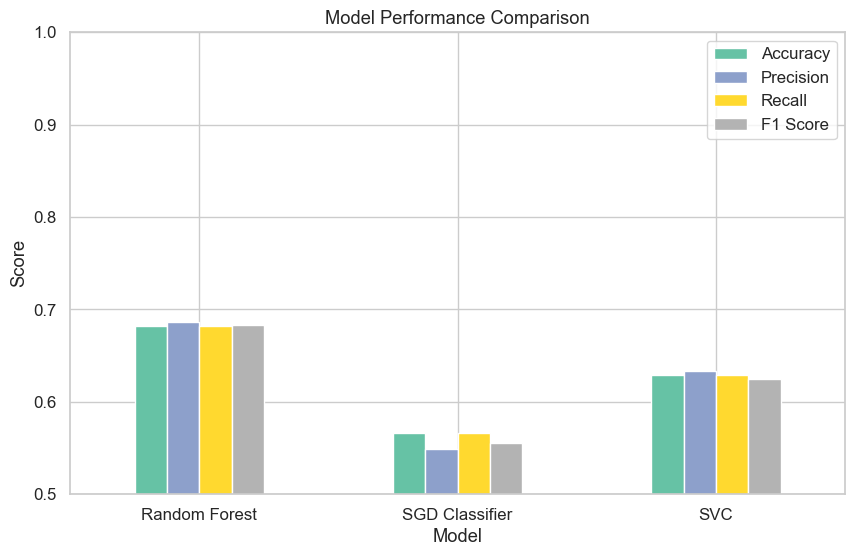

In [20]:
#  COMPARE MODELS

results_df = pd.DataFrame([rf_results, sgd_results, svc_results])
results_df.set_index("Model", inplace=True)
results_df.plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0.5, 1)
plt.grid(True, axis='y')
plt.show()

In [ ]:
#Project Summary 
Models built: Random Forest, SGD, SVC

Metrics evaluated: Accuracy, Precision, Recall, F1 Score

Visualized: Confusion matrices and comparative performance